<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1001_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
x = iris.data
y = iris.target
print(x.shape, y.shape)

(150, 4) (150,)


In [4]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(x)
model.labels_

array([147, 131, 115, 136, 143,  85,  92, 148, 137, 146, 144,  97, 123,
        84, 105, 107, 132, 114, 101, 142,  98,  89, 119, 120, 135, 117,
       118,  67,  77, 141,  76, 138,  82,  78, 108, 129,  75, 111, 112,
       140, 128,  91,  94, 106, 121,  99, 116,  48,  81, 126, 104, 103,
        71,  59, 109,  90, 139,  69,  44,  93,  95, 145,  86, 130, 127,
        64, 122,  96,  52, 110,  47,  73,  70,  79,  58,  57, 149, 124,
        55, 133,  34, 113, 134,  42,  83, 125,  88,  63,  60,  45,  40,
        41,  51, 102,  61,  66, 100,  53,  65,  62,  80,  74,  28,  49,
        39,  50,  20,  24,  38,  68,  56,  29,  30,  46,  23,  36,  33,
        16,  54,  19,  27,  37,  22,  31,  87,   9,  43,  32,  72,  35,
        14,  21,  26,  17,  25,  18,  13,  11,  15,  10,  12,   5,   8,
         4,   6,   7,   3,   2,   1,   0])

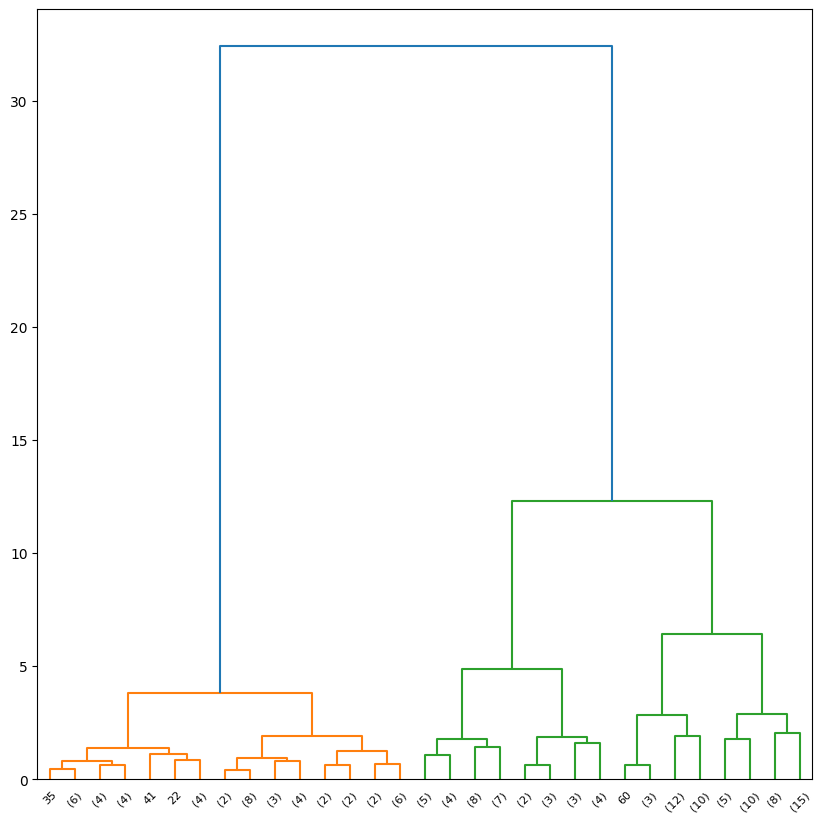

In [10]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

plt.subplots(figsize=(10, 10))
dendrogram(linkage_matrix, truncate_mode="level", p=4)
plt.show()